# Latency analysis of the dataset

This shows mean and median latencies across the dataset. These need to first be calculated using batch_create_metadata.py 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import os
import math
import seaborn as sns
from datetime import datetime, timedelta
sns.set()

from crowdplay_datasets.dataset import get_trajectory_by_id, get_engine_and_session, EpisodeModel, UserModel, EnvironmentModel, EnvironmentKeywordDataModel, EpisodeKeywordDataModel
_, session = get_engine_and_session("crowdplay_atari-v0")

P1 = 'game_0>player_0'

In [2]:

all_episodes = session.query(EpisodeModel).all()

In [10]:
import statistics
latencies = []
episode_latencies = []
episode_medians = []

for episode in all_episodes:
    if 'all' in episode.keyword_data and 'latencies' in episode.keyword_data['all'] and len(episode.keyword_data['all']['latencies'])>0 :
        latencies += episode.keyword_data['all']['latencies']
        episode_latencies.append(statistics.mean(episode.keyword_data['all']['latencies']))
        episode_medians.append(statistics.median(episode.keyword_data['all']['latencies']))


# Filter?
# latencies = [x for x in latencies if x<30]
# episode_latencies = [x for x in episode_latencies if x<30]

print(f"Average latency across all episodes: {statistics.mean(latencies)}")
print(f"Average episode mean: {statistics.mean(episode_latencies)}")
print(f"Average episode median: {statistics.mean(episode_medians)}")


print(f"median: {statistics.median(latencies)}")
print(f"Median episode mean: {statistics.median(episode_latencies)}")
print(f"Median episode median: {statistics.median(episode_medians)}")
# print(f"quantiles: {statistics.quantiles(latencies)}")

print(f"Maximum latency: {max(latencies)}")
print(f"Maximum episode latency: {max(episode_latencies)}")

print(f"Number of latencies >1s: {len([x for x in latencies if x>60])}")
print(f"Number of episodes with avg latency >1s: {len([x for x in episode_latencies if x>60])}")

Average latency across all episodes: 13.826000141751413
Average episode mean: 20.18709037211832
Average episode median: 18.718164188752425
median: 7.0
Median episode mean: 7.689089881288863
Median episode median: 7.0
Maximum latency: 3801
Maximum episode latency: 1935.4
Number of latencies >1s: 61189
Number of episodes with avg latency >1s: 677


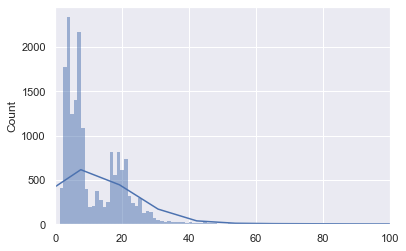

In [15]:
plot = sns.histplot(data=episode_latencies, kde=True)
plt.xlim(0,100)
plt.show()

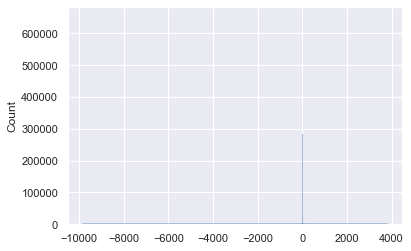

In [16]:
plot = sns.histplot(data=latencies, kde=True)
plt.xlim(0,100)
plt.show()